<a href="https://colab.research.google.com/github/fjolah/fjolah/blob/main/Synfire_Chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction to Experimental Neuroscience 2021 - Computational Neuroscience** 
*Dates: 26-31st July*

---



Tutors: Eduarda Centeno & Fjola Hyseni

Supervised by: Arthur Leblois

Location: Neurocampus - Université de Bordeaux

## Table of contents

1. [Importing packages](#imports)
2. [Forward Euler](#forward-euler)
3. [Single-neuron chain](#single-neuron-chain)
4. [Synfire chain](#synfire-chain)
5. [References & Resources](#references-resources)

 <a id="imports" ></a>
 ## **1.** Importing packages

In [1]:
# Import necessary packages
import numpy as np # https://numpy.org/
import matplotlib.pyplot as plt # https://matplotlib.org/
import random # https://docs.python.org/3/library/random.html
import ipywidgets as widgets

In [2]:
# @title Figure Settings
%config InlineBackend.figure_format='retina'
# use WIEN plot style
plt.style.use("https://raw.githubusercontent.com/bordeaux-neurocampus/WIEN2021/main/figs/nma.mplstyle")
my_layout = widgets.Layout()

## **2.** Forward Euler in the function of Integrate-and-Fire Model

**What is FE?**   \\

---


Forward Euler is the simplest numerical integrator. 

Using forward Euler integration, where the step size h (assumed to be constant for the sake of simplicity) is given by 
$ h = t_n - t_{n-1}$.
Given (tn, yn), the forward Euler method (FE) computes $y_{t+1}$ as

$$y_{n+1} = y_n + h f(y_n,t_n)$$


However, one must be careful with the forward Euler method, because it can be numerically unstable, especially for stiff equations, requiring very small time steps for obtaining accurate results.
Either way, the time step should be carefully chosen.


Video: The Euler Method


<a href='http://videolectures.net/mit1803s06_mattuck_lec02/'>
  <img src='http://videolectures.net/mit1803s06_mattuck_lec02/thumb.jpg' border=0 height=250/>
  <br/>Lecture 2: Euler's Numerical Method for y'=f(x,y) and its Generalizations</a><br/>

**IF model** \\

---


One of the simplest forms of integrate and fire neuron function.
\begin{align}
\tau\frac{dV}{dt} &= (V_0 - V)+\frac{I_{ext}}{G_{tot}}\\
\end{align}


$\tau$ is the membrane time constant, \\
$V_0$ is the resting potential, \\
$V$ is the membrane potential, \\
$I_{ext}$ is the external current and \\
$G_{tot}$ is total conductance.


\begin{align}
V = V_0 + \frac{I_{ext}}{G_{tot}}(1- e^{-\frac{t-t0}{\tau}})
\end{align}
If V = Vt (threshold), neuron spikes and voltage gets set to 0.

To Dos: 

---



> Write the function of a single IF neuron, assuming $V_{0} = 0$ and $I = \frac{I_{ext}}{G_{tot}}$, where I is the input. (Hint: write the formula beforehand).

> Using the function you wrote, implement  Forward Euler to find the next timestep based on the previous one.


> Consider threshold as 1 and set voltage to 0 when this threshold is reached.









In [3]:
def f(v, I, tau):
  """This function provides the result of dv/dt.

  Parameters
  ----------
  v (float):    Electric potential.
  I (float):    Input given externally to introduce spiking activity in the
  neuron; current/conductance.
  tau (float):  Membrane time constant.

  Returns
  -------
  Result of the function for the given values.

  """
  return (I-v)/tau #FILL IN


In [4]:
def ForwardEuler(f, duration, dt, I, tau):
  """This function integrates the differential equation by using the Forward 
  Euler method and it computes the electric potential value in time. When the 
  threshold potential is reached, it peaks and the index after that is set to 
  the resting potential.
   
  Parameters
  ----------
  f : function,         Differential equation outcome.
  duration (int) :      Duration of stimulation, milliseconds.
  dt (float):           Elementary time steps.
  I(int) :              Input given externally to introduce spiking activity in the 
  neuron; current/conductance.
  tau (float):          Membrane time constant.

  Returns
  -------
  v (array of float):   Electric potential, millivolts.
  t (array of float):   Time in ms.
  peaks (list):         Index where the potential reaches its peak.

  """
  
  n = int(duration/dt)
  
  #setting up the arrays according to the number of iterations
  t = np.zeros(n+1)
  v = np.zeros(n+1)
  
  # setting initial condition to 0
  v[0] = 0 
  
  #make a list that records all the peaks a neuron has in time 
  #(why did we choose a list and not an array?- Q for the students)
  peaks = []
  
  for k in range(n):
      #FE
      t[k+1] = t[k] + dt
      v[k+1] = v[k] + dt*f(v[k], I, tau) #FILL IN
      
      #setting V to 0 when threshold is reached
      if v[k] >= 1: # firing threshold 
        v[k+1] = 0                        #FILL IN
        
        #appending the peak index  to the list
        peaks.append(k)                   #FILL IN

  return v, t, peaks

## **2.1** Single Neuron 




Visualization of a single integrate and fire neuron in time (first 100 timesteps).


In [5]:
# @title Single neuron plot

# @markdown Make sure you execute this cell to enable the widget!

my_layout.width = '500px'
@widgets.interact(
    duration_w=widgets.FloatSlider(1, min=0, max=10., step=1,
                                 layout=my_layout),
    dt_w=widgets.FloatSlider(.001, min=.001, max=.005, step=.001,
                                 layout=my_layout, readout_format='.3f'),
    I_w=widgets.FloatSlider(2, min=0, max=5, step=1,
                                 layout=my_layout),
    tau_w=widgets.FloatSlider(0.01, min=0.01, max=0.05, step=0.01,
                                 layout=my_layout)
)

def plot_SIF(duration_w, dt_w, I_w, tau_w, grid=True):
    v, t, peaks = ForwardEuler(f, duration_w, dt_w, I_w, tau_w)
    fig, ax = plt.subplots(1, 1)
    ax.plot(t[0:100], v[0:100]) # Plot 100 first
    ax.set_ylabel('Voltage(mV)')
    ax.set_xlabel('Time(ms)')
    ax.set_title("Voltage as a function of time")
    ax.grid(grid)

interactive(children=(FloatSlider(value=1.0, description='duration_w', layout=Layout(width='500px'), max=10.0,…

[*Click for solution*](link)

*Example output:*

<img alt='Solution hint' align='left' width=350 height=300 src=https://raw.githubusercontent.com/bordeaux-neurocampus/WIEN2021/main/figs/sing_neuron.PNG>

Observe how the neuron behaves when you change the parameters.

*Discussion:  What do you observe?*


## **2.2** Connected Neurons - Synapses


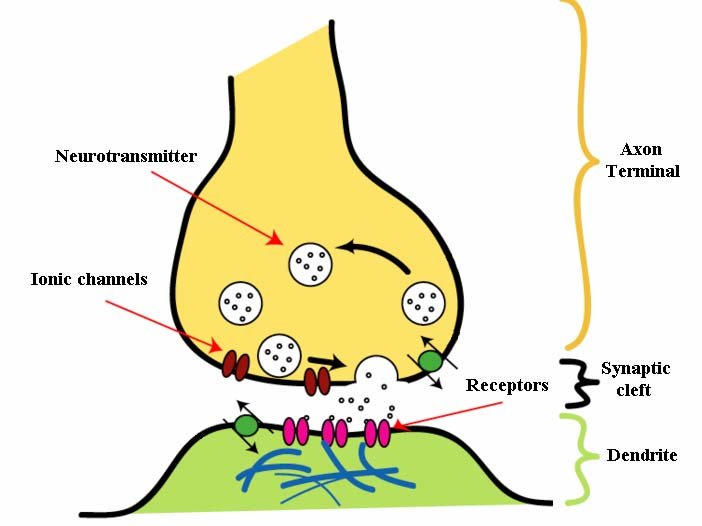










Adding a synaptic weight value to the neurons, so that each neurons' potential is affected by the neuron connected to it.


The neuron **x** who has peaked at timestep **k** is giving voltage to the neuron **x+1** he is connected to. That input is given in a simplified form as synaptic weight **w**.

Importantly, the neuron **x+1** only receives input from **x** for one timestep, when **x** has peaked.

To Dos:

---




> Check if the timestep index (k) is inside the peaks list you created.


> If it is in the list, then add the synaptic weight to the next timestep of this next neuron. 

>  Set the voltage to 0 after the target neuron has peaked.

In [6]:
def ForwardEulertarget(weight, f, duration, dt, I, tau, peaks):
  """This function computes with Forward Euler v and t. It takes the peak
  indices from source neuron and adds a synaptic weight value to the target 
  neuron's potential at the next timestep. When the threshold potential is reached, 
  it peaks and the index after that is set to the resting potential. 

  Parameters
  ----------
  weight (int):         Factor by which one neuron's peak affects the other.
  f :                   Differential equation.
  duration (int) :      Duration of stimulation, milliseconds.
  dt (float):           Elementary time steps.
  I(int) :              Input given externally to introduce spiking activity in the 
  neuron; current/conductance.
  tau (float):          Membrane time constant.
  peaks (list):         Index where the potential reaches its peak.

  Returns
  -------
  v (array of float):   Electric potential, millivolts.
  t (array offloat):    Time in ms.

  """
  n = int(duration/dt)
  #setting up the time and voltage arrays for the next neurons
  t1 = np.zeros(n+1)
  v1 = np.zeros(n+1)
  
  for k in range(n):
      #FE- FILL IN
      t1[k+1] = t1[k] + dt
      v1[k+1] = v1[k] + dt*f(v1[k], I, tau)
      
      #give input to the target neuron when x has peaked
      if k in peaks:
          v1[k+1] += weight*0.2 #w - synaptic weight variable
      
      #set voltage to 0 after peak
      if v1[k] >= 1:
         v1[k+1] = 0
        
  return v1, t1



Visualization of three single integrate and fire neurons, where one is connected to two different neurons.
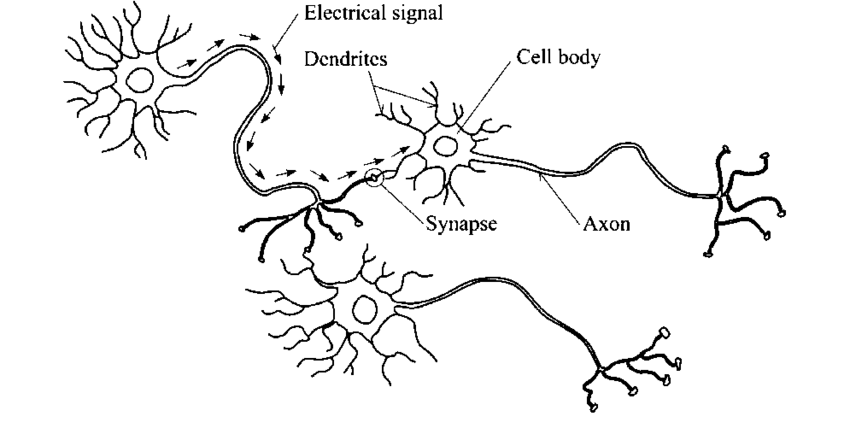

In [7]:
# @title Synapse plot

# @markdown Make sure you execute this cell to enable the widget!

my_layout.width = '500px'
@widgets.interact(
    weight1_w=widgets.FloatSlider(1, min=0, max=5, step=1,
                                 layout=my_layout),
    weight2_w=widgets.FloatSlider(2, min=0, max=5, step=1,
                                 layout=my_layout),
    duration_w=widgets.FloatSlider(1, min=0, max=10., step=1,
                                 layout=my_layout),
    dt_w=widgets.FloatSlider(.001, min=.001, max=.005, step=.001,
                                 layout=my_layout, readout_format='.3f'),
    I_w=widgets.FloatSlider(2, min=0, max=5, step=1,
                                 layout=my_layout),
    tau_w=widgets.FloatSlider(0.1, min=0.1, max=0.5, step=0.1,
                                 layout=my_layout)
)
def plot_SYN(weight1_w, weight2_w, duration_w, dt_w, I_w, tau_w):
  v, t, peaks = ForwardEuler(f, duration_w , dt_w, I_w, tau=0.01) # Neuron 1
  v1, t1 = ForwardEulertarget(weight1_w, f, duration_w, dt_w, 0, tau_w, peaks) # Neuron 2
  v2, t2 = ForwardEulertarget(weight2_w, f, duration_w, dt_w, 0, tau_w, peaks) # Neuron 3
  fig, ax = plt.subplots(1, 1)  
  ax.set_xlabel("Time(ms)")
  ax.set_ylabel("Voltage(V)")
  plt.plot(t, v, linestyle='dashed', alpha=0.5, color='black')
  plt.plot(t1, v1)
  plt.plot(t2, v2)
  plt.xlim(0, 0.1)
  plt.legend(["Neuron 1","Neuron 2", "Neuron 3"])

interactive(children=(FloatSlider(value=1.0, description='weight1_w', layout=Layout(width='500px'), max=5.0, s…

[*Click for solution*](link)

*Example output:*

<img alt='Solution hint' align='left' width=350 height=250 src=https://raw.githubusercontent.com/bordeaux-neurocampus/WIEN2021/main/figs/synapse.PNG>

## **3.** Chain of Single Neurons

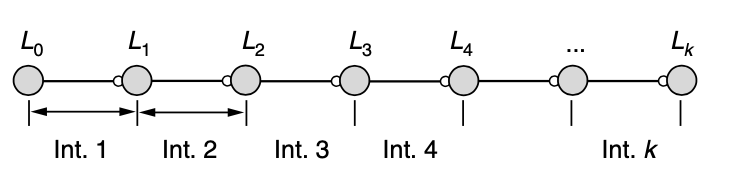


$$ \tau\frac{dV}{dt} = -(V_\alpha- V_{rest}) + W_\alpha E(t-t^{\alpha-1}) $$


where τIF is the leak time constant, $W_\alpha$ is the synaptic weight between layers $\alpha -1$ and $\alpha$ , and E(t) is the causal post-synaptic potential that follows a pre-synaptic spike. When the membrane potential reaches a threshold, $V_{th}$, the neuron produces a spike and the membrane potential is reset to $V_R$. We assume that the neuron is at rest potential, $V_{rest}$, when the pre-synaptic spike arrives.

$$ E(t) = \phi(t)e^{-t/\tau_s} $$

where $\phi(t)$ is a step function.


Synaptic weight matrix - each neuron affects the next one.

In [8]:
#Parameters & Initialization
ms = 0.001
dt = 0.01*ms
duration  = 60*ms
tau = 10*ms #tau of the fire and integrate neuros
taus = 5*ms #tau of the synapse
n = int(duration/dt) #number of steps
neuron_nr = 11 #number of neurons
threshold = -50
rest = -60
np.random.seed(1) #initialization of the random
V = np.zeros((neuron_nr,n+1))-60
t = np.linspace(0, duration, n+1)
I = tau*(threshold-rest)/dt + 1 #current given only for the first layer

To Dos:

---


> Create a 2D array where each dimension contains the neurons.


> Assign the connection between neuron each **x+1** neuron affected by **x** with a synaptic weight of 43.


> Change the weight between the 5th and 4th neuron to "weight".

> Set the connection between the first neuron and the last to 0.






In [9]:
def synaptic_weight(neuron_nr, weight):
  """Function to create the synaptic weight matrix.

  Parameters
  ----------
  neuron_nr (int):                Number of neurons.
  weight (int):                   Synaptic weight between two neurons

  Returns
  -------
  W (array of float 2D (nr,nr)):  Synaptic weight matrix.
  
  """
  #building the 2D array
  W = np.zeros((neuron_nr,neuron_nr)) # FILL IN
  
  for i in range(neuron_nr-1):
    W[i+1,i] = 43                     #FILL IN
  #np.fill_diagonal(W[1:], 43)
  
  # #5th neuron's effect from 4th
  W[5,4] = weight                #FILL IN


 
  
  return W

Visualization

This part starts with the first timestep and creates an array that saves the last time every neuron fires.

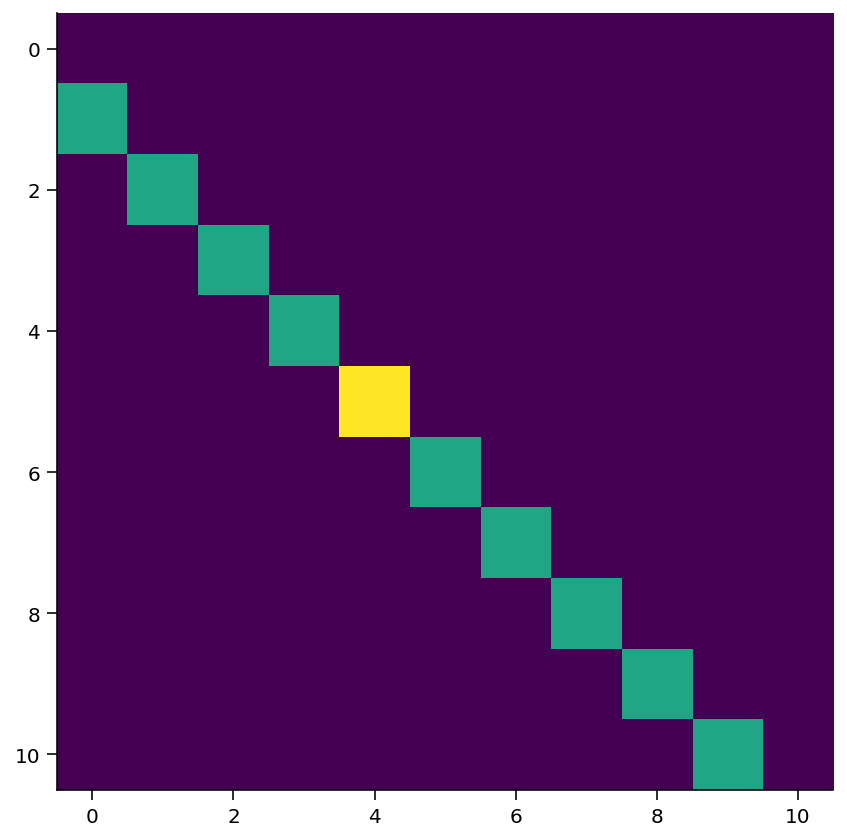

In [10]:
W = synaptic_weight(neuron_nr, 73)
plt.imshow(W)

In [11]:
#only for the first timestep
V[0,1] = I/tau*dt + rest
def create_all_spikes(V=V, I=I, tau=tau, dt=dt, rest=rest, threshold=threshold):
  """This function creates an array of spikes for the first timestep.

  Parameters
  ----------
  v (array of float):   Electric potential, millivolts.
  dt (float):           Elementary time steps.
  I(int) :              Input given externally to introduce spiking activity in the 
  neuron; current/conductance.
  tau (float):          Membrane time constant.
  rest (int):           Resting voltage
  threshold (int):      Voltage when the neuron spikes

  Returns
  -------
  spikes_yn (array):    Info whether the neuron has spiked or not at that timestep.
  last_spikes (array):  Time of each neuron's spike.
  all_spikes (list):    All spiking times of each neuron.
  """
  
  #a boolean array that confirms spike or not
  spikes_yn = (V[:,1]>=threshold)
  
  #set an array that registers the time of the last spike
  last_spikes = spikes_yn * dt
  
  # for j in range(len(spikes_yn)):
    
  #   #if there is a spike, find the time when it happened
  #   if spikes_yn[j] == 1:
  #     last_spikes[j] = 1*dt #FILL IN 
    
  #   else:
  #     #if not, leave it as it is
  #     last_spikes[j] = last_spikes[j] #FILL IN
  
  #create a list that takes in all the arrays of spike times
  #HINT: use np.column_stack
  all_spikes = np.column_stack((last_spikes,last_spikes)) #FILL IN
  all_spikes = all_spikes.tolist() 
  
  return all_spikes, spikes_yn, last_spikes

Post - synaptic potential. $\phi(t)$ is a step function.
$$ E(t) = \phi(t)e^{-t/\tau_s} $$
$$ E(t - t_{\alpha}) = \phi(t- t_{\alpha})e^{(-(t- t_{\alpha}))/\tau_s} $$

In [12]:
def postsyn_potential(neuron_nr, n, taus, all_spikes, k, dt):
  """This function generates the causal post-synaptic potential that follows a presynaptic spike

  Parameters
  ----------
  neuron_nr (int):    Number of neurons.
  n (int):            Number of iterations.
  taus (float):       Synaptic time constant.
  dt (float):         Elementary time steps.
  all_spikes (list):  All spiking times of each neuron.    
  k (int):            Iteration.

  Returns
  -------
  E (array):          Causal post-synaptic potential.

  """
  E = np.zeros(neuron_nr)
  for m in range(neuron_nr):
    e = 0
    
    #from the list of all recorded spike times, take into account only the ones
    #registered once
    f_times = np.unique(all_spikes[m]) #FILL IN
    
    for n in range(len(f_times)):
      
      #find the postsynaptic potential for every previous spike 
      et = np.sign(f_times[n]) *(np.exp(-((k+2)*dt - f_times[n])/taus)) #FILL IN
      
      #add postsynaptic potentials for every previous spike to find the postsynaptic 
      #potential of the neuron
      e += et
    
    E[m] = e
  return E

The code then continues computing the necessary arrays and peak times starting from the second timestep.


$$ \tau\frac{dV}{dt} = -(V_\alpha- V_{rest}) + W_\alpha E(t-t^{\alpha-1}) $$

In [13]:
def weight_related_result(weight, neuron_nr=neuron_nr, n=n, taus=taus, dt=dt, threshold=threshold):
  """This function serves to give the V array and peaks.

  Parameters
  ----------
  weight (int):       Synaptic weight between two neurons
  neuron_nr (int):    Number of neurons.
  n (int):            Number of iterations.
  taus (float):       Synaptic time constant.
  dt (float):         Elementary time steps.
  threshold (int):    Voltage when the neuron spikes


  Returns
  -------
  V (array of float):   Electric potential, millivolts.
  peaks (list):         Index where the potential reaches its peak.

  """
  #use the create_all_spikes function to create them for the first ts
  all_spikes, spikes_yn, last_spikes = create_all_spikes()

  peaks = []
  for k in range(n-1):
    
    #calculate postsynaptic potential
    E = postsyn_potential(neuron_nr, n, taus, all_spikes, k, dt)

    #build the weight matrix
    W = synaptic_weight(neuron_nr, weight)

    #complete based on the formula dv/dt
    deltaV_t = -(V[:,k+1]-rest)/tau + np.dot(W,E)/tau    
    
    #FE
    V[:,k+2] = V[:,k+1] + deltaV_t *dt   
    
    #set the next ts to 0 if there is a spike
    for i in range(len(spikes_yn)):
      if spikes_yn[i] == 1:
        V[i,k+2] = rest
      if spikes_yn[i] == 0:
        V[i,k+2] = V[i,k+2]
    
    #check if the threshold was reached       
    spikes_yn = (V[:,k+2]>=threshold)

    #record spikes
    A = np.argwhere(spikes_yn == True)
    last_spikes = spikes_yn * dt * (k+2)
    # for j in range(len(spikes_yn)):
    #   if spikes_yn[j] == 1:
    #     last_spikes[j] = (k+2)*dt
    #   else:
    #     last_spikes[j] = last_spikes[j]
                
    for m in range(neuron_nr):
      if last_spikes[m] not in all_spikes[m]:
        all_spikes[m].append(last_spikes[m])
    peaks.append(A)
  return V, peaks

Visualization of the neurons and the raster plot.

In [14]:
#@title Chain plot

# @markdown Make sure you execute this cell to enable the widget!

my_layout.width = '300px'
@widgets.interact(
    weight_w=widgets.FloatSlider(73, min=40, max=90, step=1,
                                 layout=my_layout)
)
def plot_CHAIN(weight_w):
  V, peaks = weight_related_result(weight_w)
  fig = plt.figure(figsize = (8,10))
  ax = plt.subplot(2,1,1)
  plt.title("Synaptic weight = " + str(weight_w) + "mV")
  for i in range(neuron_nr):
    ax.plot(t, V[i,:], color= "red", alpha = 0.25, linewidth = 0.5)
  ax.plot(t, V[1,:], color= "darkred", alpha = 1, linewidth = 1.5)
  plt.xlim(0, duration)  
  ax.set_ylabel("Potential")
  ax = plt.subplot(2,1,2) #Raster
  plt.title("Spiking times for neurons")
  plt.xlim(0, duration)  
  plt.ylim(0, neuron_nr)
  ax.set_xlabel("Time")
  ax.set_ylabel("Neuron Index")
  spikes = []
  for i in range(len(peaks)):
    for j in range(len(peaks[i])):
      plt.plot(t[i],peaks[i][j], "|", color = "darkred")

  plt.tight_layout()

interactive(children=(FloatSlider(value=73.0, description='weight_w', layout=Layout(width='300px'), max=90.0, …

[*Click for solution*](link)

*Example output:*

<img alt='Solution hint' align='left' width=550 height=650 src=https://raw.githubusercontent.com/bordeaux-neurocampus/WIEN2021/main/figs/chain_single.png>

## **4.** Synfire Chain

Synfire chain, 10 layers of 15 neurons, simulation duration = 300 ms

 $$ \tau_{IF}\frac{dV_i}{dt} = -(V_i- V_{rest}) + I_{syn,i}(t) + I_{ext,i}(t) + \sqrt{\tau_n}\sigma\eta_i(t) $$
A zero  mean Gaussian white noise is added to the model.
$$  I_{syn,i}(t) = \sum_jW_{ij}\sum_kE(t-t_j^k) $$
 
$$ E(t) = \phi(t)e^{-t/\tau_s} $$

Defining the constants and the simulation parameters.
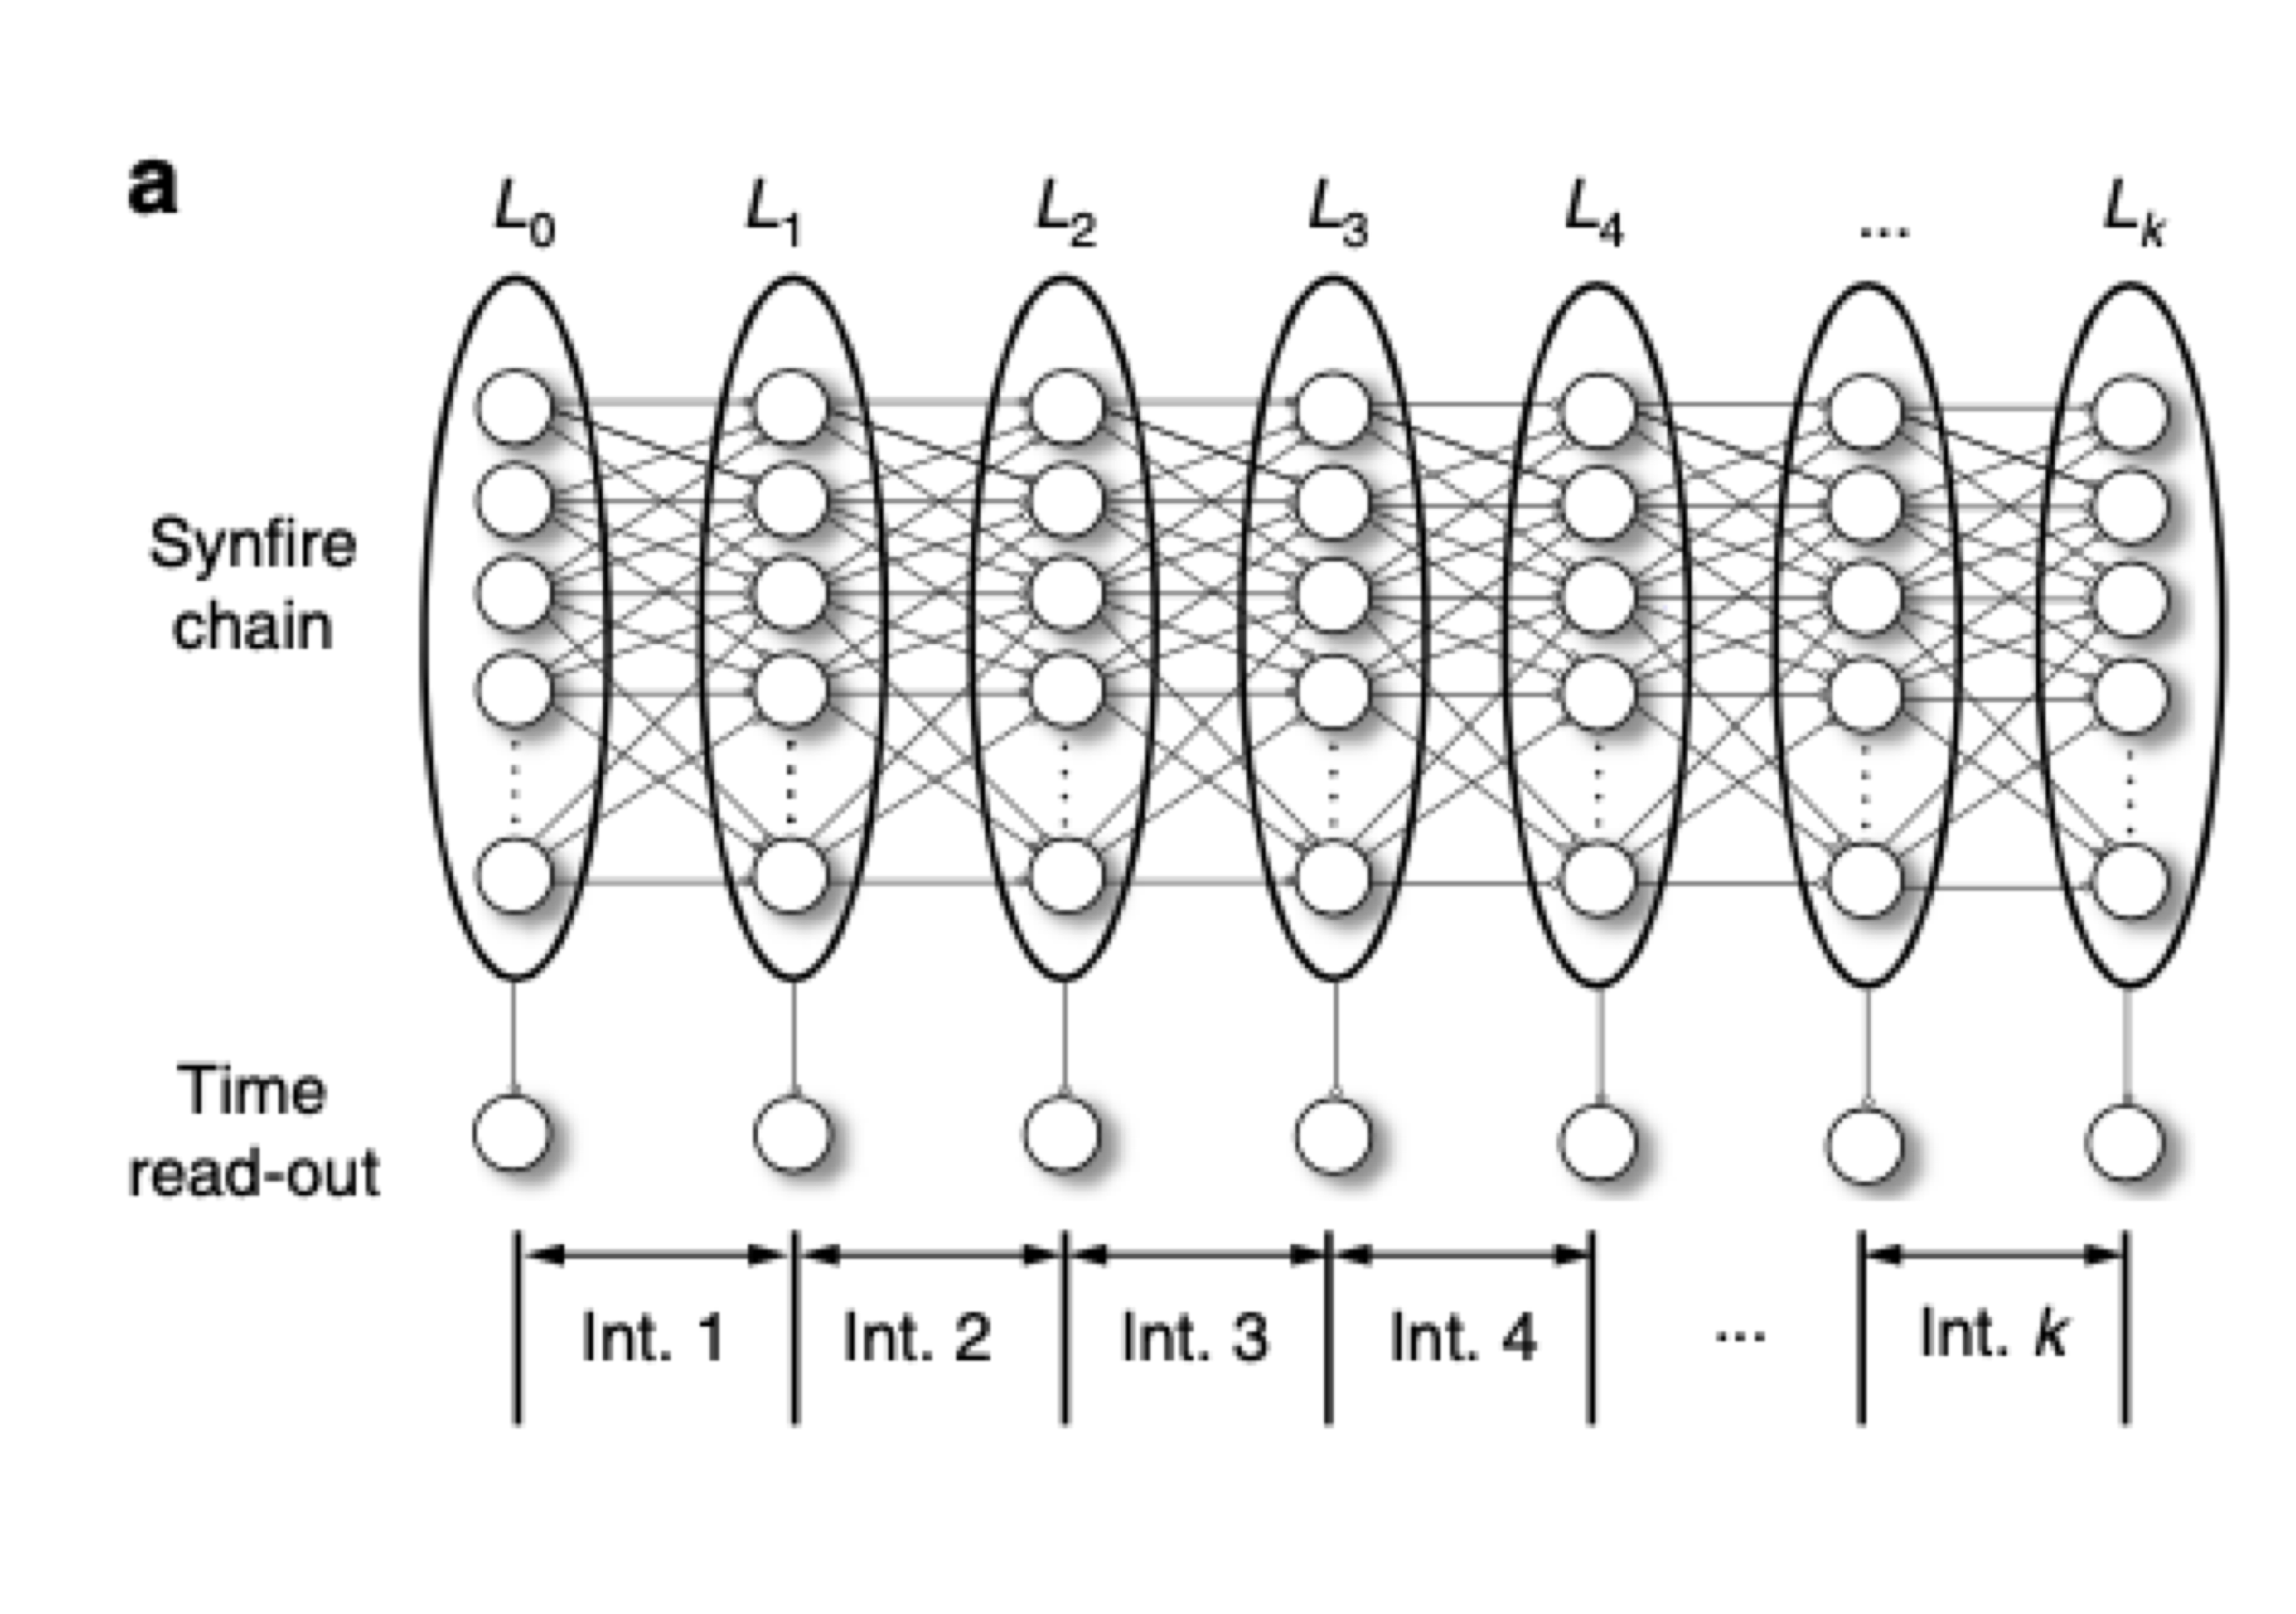


In [20]:
#constants
s = second = 1.0
ms = millisecond = 0.001
debug = False

# simulation parameters
seed = 1
dt = 0.1*ms
duration  = 300 * ms
n_iterations = int(np.ceil(duration/dt)) 

Building the  model and the parameters.

In [21]:
layer_number = 10
layer_size = 15
tau_synapse = 5*ms        #tau of the synapse
tau_neuron  = 10*ms       #tau of the integrate and fire neurons
V_rest  = -60
V_reset = -55
V_spike = -50
# building the model
V1 = np.zeros((layer_number, layer_size,n_iterations))-60 
V = V1.reshape(layer_number*layer_size,n_iterations) 
t = np.linspace(0, duration, n_iterations)
I = np.zeros((layer_number*layer_size, n_iterations))
I[:15,:50] = 30  #external current given only for the first layer, for 5ms
W = np.zeros((layer_number, layer_size, layer_number, layer_size))
noise_mean = 0
noise_std = 1
noise_scale = np.sqrt(10*ms)

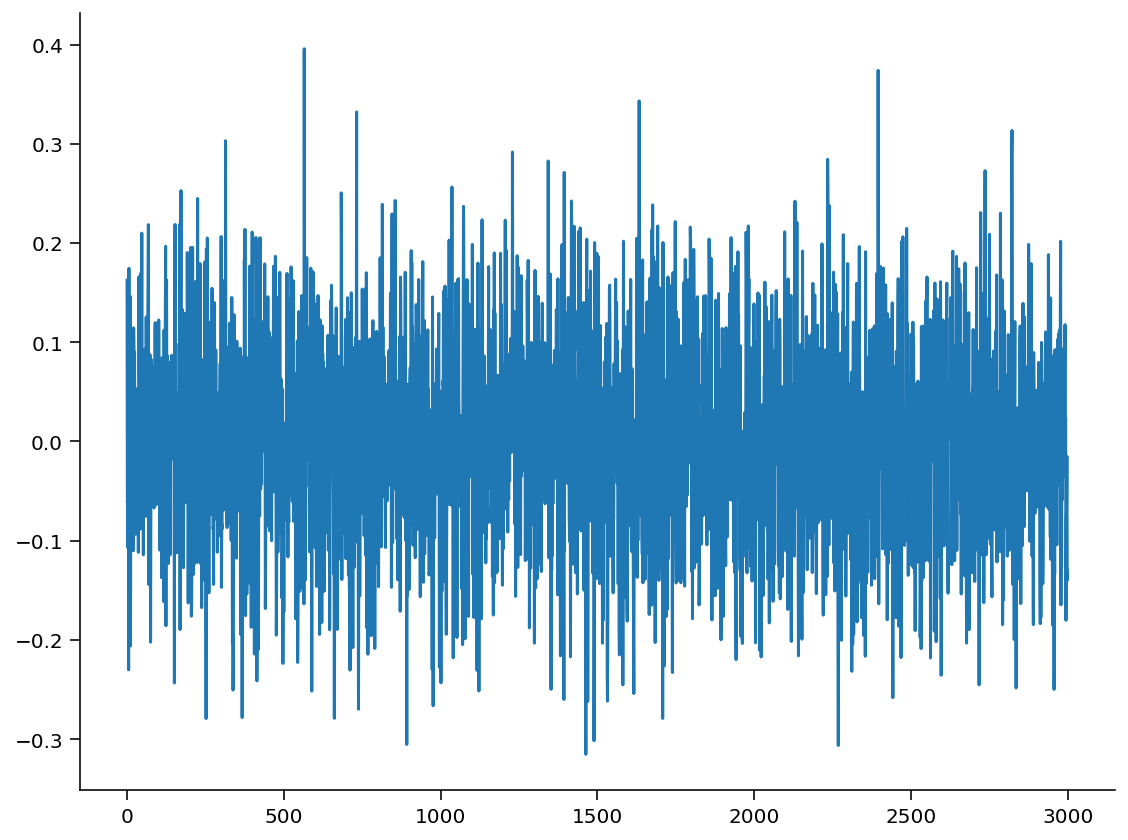

In [22]:
noise = np.random.normal(noise_mean, noise_std, (n_iterations))
plt.plot(noise*noise_scale)


Setting up the synaptic connectivity.

In [23]:
#similar to the weight matrix at section 3, but careful with the dimensions.
def synaptic_weight(layer_number, layer_size, weight):
  """Function to create the synaptic weight matrix.

  Parameters
  ----------
  layer_nr (int):                 Number of layers.
  layer_size (int):               Number of neurons per layer.
  weight (int):                   Synaptic weight between two neurons.

  Returns
  -------
  W (array of float 2D (nr,nr)):  Synaptic weight matrix.
  
  """
  #creating a 4D array for W
  W = np.zeros((layer_number, layer_size, layer_number, layer_size))

  for i in range(layer_number-1): 
      W[i+1,:,i,:] = 3
  W[5,:,4,:] = weight

  #reshape the W matrix to fit 2D
  neuron_nr = layer_number*layer_size
  W = W.reshape(neuron_nr,neuron_nr)
  
  return W, neuron_nr
  
W,neuron_nr = synaptic_weight(layer_number,layer_size,2.17)

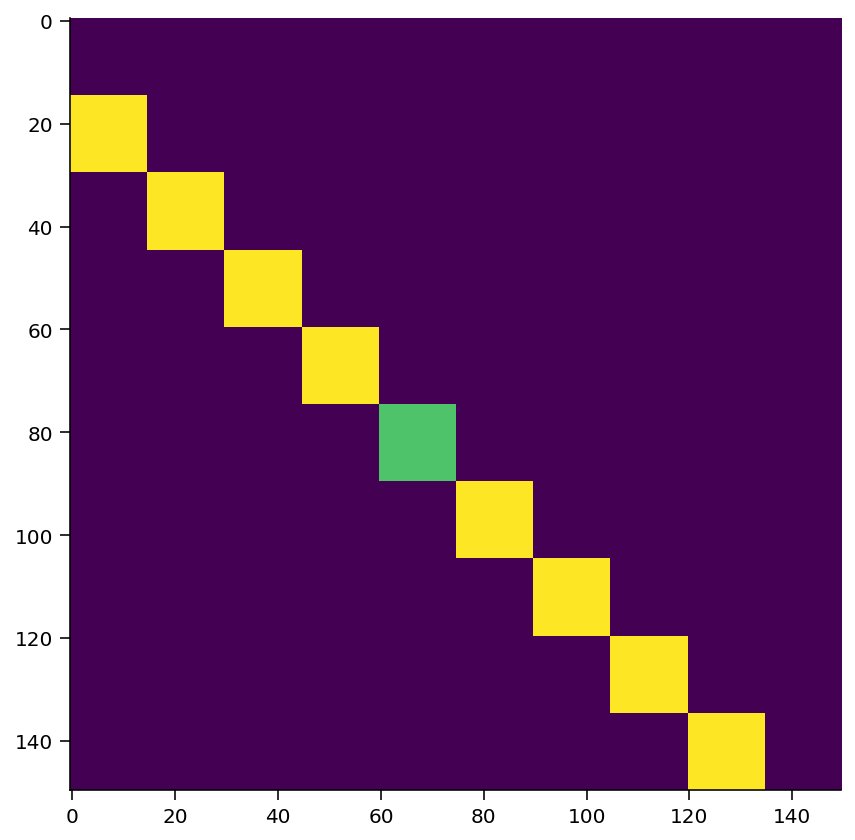

In [24]:
plt.imshow(W)

This part starts with the first timestep and creates an array that saves the last time every neuron fires.

In [25]:
#you can use function that you created in Section 3. Just remember to
#change the parameters when you call the function.

def create_all_spikes(V=V, dt=dt, threshold=V_spike):  
  #a boolean array that confirms spike or not
  spikes_yn = (V[:,1]>=threshold)
  
  #set an array that registers the time of the last spike
  last_spikes = np.zeros(len(spikes_yn))
  last_spikes = spikes_yn * dt
  # for j in range(len(spikes_yn)):
    
  #   #if there is a spike, find the time when it happened
  #   if spikes_yn[j] == 1:
  #     last_spikes[j] = 1*dt #FILL IN 
    
  #   else:
  #     #if not, leave it as it is
  #     last_spikes[j] = last_spikes[j] #FILL IN
  
  #create a list that takes in all the arrays of spike times
  #HINT: use np.column_stack
  all_spikes = np.column_stack((last_spikes,last_spikes)) #FILL IN
  all_spikes = all_spikes.tolist() 
  
  return all_spikes, spikes_yn, last_spikes


$$ E(t) = \phi(t)e^{-t/\tau_s} $$

In [26]:
#you can use function that you created in Section 3. Just remember to
#change the parameters when you call the function.
def postsyn_potential(neuron_nr, n, taus, all_spikes, k, dt):
    """This function generates the causal post-synaptic potential that follows a presynaptic spike

    Parameters
    ----------
    neuron_nr (int):    Number of neurons.
    n (int):            Number of iterations.
    taus (float):       Synaptic time constant.
    dt (float):         Elementary time steps.
    all_spikes (list):  All spiking times of each neuron.    
    k (int):            Iteration.

    Returns
    -------
    E (array):          Causal post-synaptic potential.

    """
    E = np.zeros(neuron_nr)
    for m in range(neuron_nr):
      e = 0
      
      #from the list of all recorded spike times, take into account only the ones
      #registered once
      f_times = np.unique(all_spikes[m]) #FILL IN
      
      for n in range(len(f_times)):
        #find the postsynaptic potential for every previous spike 
        et = (np.exp(-((k+2)*dt - f_times[n])/taus)) * np.sign(f_times[n]) #FILL IN
        
        #add postsynaptic potentials for every previous spike to find the postsynaptic 
        #potential of the neuron
        e += et #FILL IN

      E[m] = e
    return E

The code then continues computing the necessary arrays and peak times starting from the second timestep.
 $$  I_{syn,i}(t) = \sum_jW_{ij}\sum_kE(t-t_j^k) $$
 $$ \tau_{IF}\frac{dV_i}{dt} = -(V_i- V_{rest}) + I_{syn,i}(t) + I_{ext,i}(t) + \sqrt{\tau_n}\sigma\eta_i(t) $$

In [27]:
def weight_related_result(weight, n_iterations=n_iterations, neuron_nr=neuron_nr, 
                          noise_mean=noise_mean, noise_std=noise_std, 
                          tau_neuron=tau_neuron, tau_synapse=tau_synapse, 
                          dt=dt, layer_number=layer_number, 
                          layer_size=layer_size, threshold=V_spike, I = I):
  """This function serves to give the V array and peaks.
    (very similar to the same labelled function in section 3)
    
  Parameters
  ----------
  weight (float):       Synaptic weight
  n_iterations (int):   Number of iterations.
  neuron_nr (int):      Number of neurons.
  noise_mean :          Mean of the injected noise.
  noise_std :           Standard deviation of noise.
  tau_neuron (float):   Neuron time constant
  tau_synapse (float):  Synaptic time constant.
  dt (float):           Time step.
  layer_number (int):   The number of layers.  
  layer_size (int) :    The number of neurons per layer.
      

  Returns
  -------
  V (array of float):   Electric potential, millivolts, in time.     
  V1 (array of float):  Electric potential, millivolts, in time; rearranged array.
  peaks (list):         Index where the potential reaches its peak.

  """
  all_spikes, spikes_yn, last_spikes = create_all_spikes()

  peaks = []
  for k in range(n_iterations-2):
    #call the postsynaptic potential and synaptic weight function to calculate them
    E = postsyn_potential(neuron_nr, n_iterations, tau_synapse, all_spikes, k, dt)
    W,neuron_nr = synaptic_weight(layer_number,layer_size,weight)
    #noise
    noise = np.random.normal(noise_mean, noise_std, neuron_nr)
    #based on equation above
    deltaV_t = (-(V[:,k+1]-V_rest)+ np.dot(W,E)+ I[:,k+1]+(noise * noise_scale))/tau_neuron
    #FE
    V[:,k+2] = V[:,k+1] + deltaV_t*dt
      

    for i in range(len(spikes_yn)):
      if spikes_yn[i] == 1:
        V[i, k+2] = V_reset          
      elif spikes_yn[i] == 0:
        V[i,k+2] = V[i,k+2]
              
    spikes_yn = (V[:,k+2]>=V_spike)
    A = np.argwhere(spikes_yn == True)
    last_spikes = spikes_yn * (k+2) * dt
              
    for m in range(neuron_nr):
      if last_spikes[m] not in all_spikes[m]:
        all_spikes[m].append(last_spikes[m])
        
    peaks.append(A)
  return V, peaks



Visualizing the results. 

In [29]:
#@title Synfire Chain plot

# @markdown Make sure you execute this cell to enable the widget!

my_layout.width = '300px'
@widgets.interact(
    weight_w=widgets.FloatSlider(1, min=1, max=5, step=0.01,
                                 layout=my_layout)
)
def plot_SYNFIRE(weight_w):
  V, peaks = weight_related_result(weight_w)
  fig = plt.figure(figsize = (8,10))
  ax = plt.subplot(2,1,1)
  plt.title("Synaptic weight = " + str(weight_w) )
  for n in range(layer_number):
      ax.plot(t, V1[n,0,:], color= "red", alpha = 0.25, linewidth = 0.5)
  ax.plot(t, V1[0,0,:], color= "darkred", alpha = 1, linewidth = 1.5)
  plt.xlim(0,duration)  
  ax.set_ylabel("Potential")
  ax.set_xlabel("Time")
  
  ax = plt.subplot(2,1,2) #Raster
  plt.title("Spiking times for neurons")
  plt.ylim(0,layer_size*layer_number)

  for i in range(len(peaks)):
    for j in range(len(peaks[i])):
      plt.plot(t[i],peaks[i][j], "|", color = "darkred")

  plt.tight_layout()

interactive(children=(FloatSlider(value=1.0, description='weight_w', layout=Layout(width='300px'), max=5.0, mi…

[*Click for solution*](link)

*Example output:*

<img alt='Solution hint' align='left' width=450.0 height=600.0 src=https://raw.githubusercontent.com/bordeaux-neurocampus/WIEN2021/main/figs/synfire.png>

## **5.** References & Resources
Main Materials - Must Reads
1. Pehlevan, C., Ali, F. & Ölveczky, B.P. Flexibility in motor timing constrains the topology and dynamics of pattern generator circuits. Nat Commun 9, 977 (2018). https://doi.org/10.1038/s41467-018-03261-5
2. https://ocw.mit.edu/courses/mathematics/18-03-differential-equations-spring-2010/video-lectures/lecture-2-eulers-numerical-method-for-y-f-x-y/  (up to 35')
3. http://www.scholarpedia.org/article/Synfire_chain
4. https://neuronaldynamics.epfl.ch/online/Ch1.S3.html
5. https://brian2.readthedocs.io/en/stable/resources/tutorials/1-intro-to-brian-neurons.html